## 1.4 Solving Ordinary Differential Equations (ODE) - Boundary Value Problem (BVP)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

Resources from Berkeley

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.00-ODE-Boundary-Value-Problems.html



___
### 1.4.1 Shooting Method

___

**Example 1**

What is the initial velocity of the particle required if it is at 50m above the ground at t=5s? 

$$ \frac{d^2y}{dt^2} = -g $$

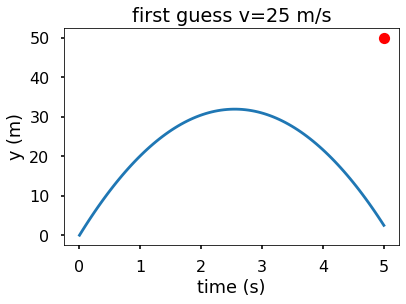

In [38]:
# constants
g = 9.8

# initial conditions
y0 = 0
v0 = 25 # our 1st guess for v0

# boundary conditions
tf = 5
yf = 50 # y at t=5s

# [y, y']
# y_init = [y0, v0]

def rhs(y, t):
    return [y[1], -g]

t = np.linspace(0, 5, 100)
# y = odeint(rhs, y_init, t)

def plot_graph(title, y, t, yf, tf):
    # plot the solution
    plt.plot(t, y[:, 0])
    # plot the boundary at t_final
    plt.plot(tf, yf, 'ro')
    plt.xlabel('time (s)')
    plt.ylabel('y (m)')
    plt.title(title)
    plt.show()
    
plot_graph(f'first guess v={v0} m/s', odeint(rhs, [y0, v0], t), t, yf, tf)

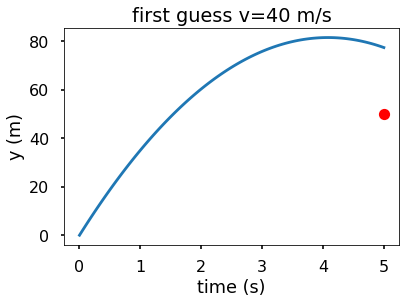

In [39]:
v0 = 40
plot_graph(f'first guess v={v0} m/s', odeint(rhs, [y0, v0], t), t, yf, tf)

We would like the final position to be at the red dot (50m) so $y_{final}$ from the odeint must be the same as yf (50m).

The objective funtion to be acheived is that $y_{final} - y{f}$ with initial speed $v_0$ as its parameter.

f(a)= -47.50000000014366
f(b)= 27.499999999926715
Optimized speed using shooting method is v=34.500000000018446 m/s


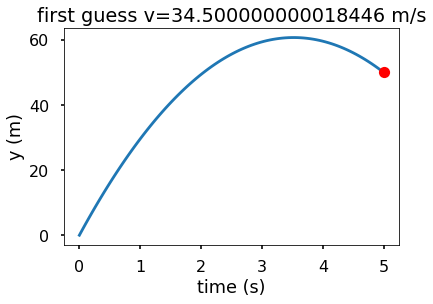

In [41]:
from scipy.optimize import brentq

def objective_func(v0):
    sol = odeint(rhs, [y0, v0], t)
    y_final = sol[-1, 0]
    return y_final - yf

print('f(a)=', objective_func(25))
print('f(b)=', objective_func(40))

v0 = brentq(objective_func, 25, 40)
print(f'Optimized speed using shooting method is v={v0} m/s')
plot_graph(f'first guess v={v0} m/s', odeint(rhs, [y0, v0], t), t, yf, tf)

___

### 1.4.2 Finite Difference Method

**Warning** - The content here is taken from:
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.03-Finite-Difference-Method.html#finite-difference-method, which is released under MIT licensed.

Another way to solve the ODE boundary value problems is the **finite difference method**, where we can use finite difference formulas at evenly spaced grid points to approximate the differential equations. This way, we can transform a differential equation into a system of algebraic equations to solve. 

In the finite difference method, the derivatives in the differential equation are approximated using the finite difference formulas. We can divide the the interval of $[a, b]$ into $n$ equal subintervals of length $h$ as shown in the following figure. 

<img src="images/finite-difference.png" alt="finite difference" title="Finite difference grids" width="500"/>

Commonly, we usually use the central difference formulas in the finite difference methods due to the fact that they yield better accuracy. The differential equation is enforced only at the grid points, and the first and second derivatives are:

$$\frac{dy}{dx} = \frac{y_{i+1}-y_{i-1}}{2h}$$

$$\frac{d^2y}{dx^2} = \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$

These finite difference expressions are used to replace the derivatives of $y$ in the differential equation which leads to a system of $n+1$ linear algebraic equations if the differential equation is linear. If the differential equation is nonlinear, the algebraic equations will also be nonlinear.  


___
**Example 2 -** Solve the rocket problem in the previous section using the finite difference method, plot the altitude of the rocket after launching. The ODE is

$$ \frac{d^2y}{dt^2} = -g$$

with the boundary conditions $y(0) = 0$ and $y(5) = 50$. Let's take $n=10$. 

Since the time interval is $[0, 5]$ and we have $n=10$, therefore, $h=0.5$, using the finite difference approximated derivatives, we have 

$$ y_0 = 0$$

$$ y_{i-1} - 2y_i + y_{i+1} = -gh^2, \;i = 1, 2, ..., n-1$$

$$ y_{10} = 50$$

if we use matrix notation, we will have:

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2& 1 \\
 & & & &1
\end{bmatrix}\left[\begin{array}{c} y_0 \\y_1 \\ ... \\ y_{n-1}\\y_n \end{array}\right] =
\left[\begin{array}{c} 0 \\-gh^2 \\ ... \\ -gh^2 \\50\end{array}\right]$$

Therefore, we have 11 equations in the system, we can solve it using the lilear algebra method. 



[[ 1.  0.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[ 0.00e+00 -2.45e-04 -2.45e-04 ... -2.45e-04 -2.45e-04  5.00e+01]


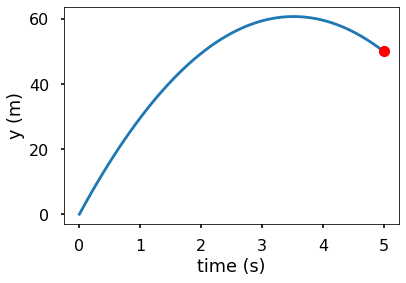

In [44]:
n = 1000
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# solve the linear equations A x = b
y = np.linalg.solve(A, b)

t = np.linspace(0, 5, n + 1)

plt.plot(t, y)
plt.plot(tf, yf, 'ro')
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.show()

____
### 1.4.3 Showcase - Using Shooting Method to Solve Eigenvalue of ODE

Consider the ODE in the following form:

$$-\frac{d^2 y}{dx^2} + C(x) y = E y$$

The fascinating thing about solutions to this equation is that these conditions result in valid solutions only for certain
values of $E$, which is know as eigentvalue of the ODE and the corresponding solution $y$ is the eigenfunction. To illustrate this, we will attempt to solve the function $y$ for a range of $E$ value.

For further simplification, we are going to use $C(x)$ defined as followed:

$$C(x) = \left\{ {\begin{array}{*{20}{c}}
{0\quad  0 < x < L}\\
{{c}\quad otherwise}
\end{array}} \right.$$


The initial conditions is $y(0)$ = 1 and $\frac{{d y(0)}}{{dx}} = 0$.

The boundary condition is $y(\infty) = 0$.

The constants are $c = 20$ and $L = 1$

In [88]:
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.optimize import brentq
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.brentq.html
# a method to find root between a given ends
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

a = 0
b = 2.0
c = 20.0
L = 1.0
steps = 100
E = 2

def C(x):
    if x < L:
        return 0
    else:
        return c

# y = [y, y'] 
def rhs(y, x):
    return [y[1], -(E-C(x))*y[0]]

def y_b(eigenvalue):
    global y
    global E
    E = eigenvalue
    y = odeint(rhs, y0, x)
    return y[-1, 0]

#y = np.zeros([steps, 2])
y0 = [1., 0.]
x = np.linspace(a, b, steps)
#y = odeint(rhs, y0, x)

answer = brentq(y_b , 0 , 10)

answer

1.6396963660479404

In [65]:
brentq(y_b , 1.64 , 20)

13.926956850405501

In [68]:
brentq(y_b , 13.93 , 30)

27.90951397282843

In [70]:
brentq(y_b , 27.91 , 50)

40.82825219503064

In [72]:
brentq(y_b , 40.9 , 80)

60.357256558981035

In [73]:
brentq(y_b , 61 , 90)

85.20567515748021

In [75]:
brentq(y_b , 86 , 120)

114.21507845017652

In [77]:
brentq(y_b , 115 , 150)

149.25143260145077

In [86]:
brentq(y_b , 150 , 190)

188.1357282192333

In [84]:
y = odeint(rhs, y0, x)

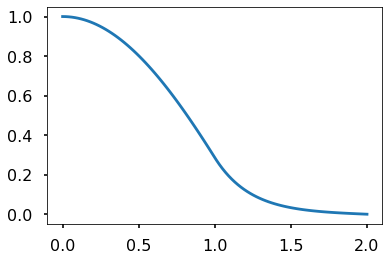

In [89]:
plt.plot(x, y[:, 0])